In [1]:
# https://towardsdatascience.com/hyper-parameters-in-action-introducing-deepreplay-31132a7b9631

from deepreplay.callbacks import ReplayData
from deepreplay.datasets.parabola import load_data

X, y = load_data()

replaydata = ReplayData(X, y, filename='hyperparms_in_action.h5', group_name='part1')

Using TensorFlow backend.


In [2]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from keras.initializers import glorot_normal, normal

model = Sequential()
model.add(Dense(input_dim=2,
                units=2,
                activation='sigmoid',
                kernel_initializer=glorot_normal(seed=42),
                name='hidden'))
model.add(Dense(units=1,
                activation='sigmoid',
                kernel_initializer=normal(seed=42),
                name='output'))

model.compile(loss='binary_crossentropy', optimizer=SGD(lr=0.05), metrics=['acc'])

model.fit(X, y, epochs=150, batch_size=16, callbacks=[replaydata])

Epoch 1/150
2000/2000 [==============================] - 0s 125us/step - loss: 0.6928 - acc: 0.5055
Epoch 2/150
2000/2000 [==============================] - 0s 75us/step - loss: 0.6912 - acc: 0.5580
Epoch 3/150
2000/2000 [==============================] - 0s 82us/step - loss: 0.6895 - acc: 0.5860
Epoch 4/150
2000/2000 [==============================] - 0s 80us/step - loss: 0.6871 - acc: 0.5675
Epoch 5/150
2000/2000 [==============================] - 0s 83us/step - loss: 0.6841 - acc: 0.6405
Epoch 6/150
2000/2000 [==============================] - 0s 82us/step - loss: 0.6799 - acc: 0.6835
Epoch 7/150
2000/2000 [==============================] - 0s 80us/step - loss: 0.6744 - acc: 0.6700
Epoch 8/150
2000/2000 [==============================] - 0s 90us/step - loss: 0.6672 - acc: 0.6885
Epoch 9/150
2000/2000 [==============================] - 0s 83us/step - loss: 0.6577 - acc: 0.7150
Epoch 10/150
2000/2000 [==============================] - 0s 114us/step - loss: 0.6449 - acc: 0.7050
Epoch 1

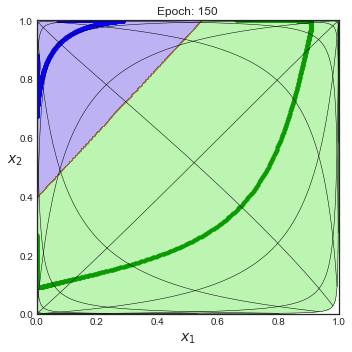

In [24]:
from deepreplay.replay import Replay
import matplotlib.pyplot as plt

replay = Replay(replay_filename='hyperparms_in_action.h5', group_name='part1')
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
fs = replay.build_feature_space(ax, layer_name='hidden')
fs.plot(epoch=150).savefig('output/feature_space_epoch150.png', dpi=120)
#fs.animate().save('feature_space_animation.mp4', dpi=120, fps=5)